# DS1 Final Presentation Outline

## Gloria Li

# Background

#  Problem Statement

# Task Journal

I started out with three steps in my process: data cleaning, data visualiation, and predictive modeling. 

**Attempt 1**: I created variables that I thought would make sense, including the percentage of net metering MWh out of total MWh sold (PV, wind, all technologies), the percentage of demand response MWh out of total MWh sold, percentage of demand response customers out of total customers, and the percentage of energy efficiency MWh saved out of total MWh sold. This led to right-skewed distributions and really high errors which I tried unsuccessfully to fix with two methods: logging and median classifiers (see Results section).

**Attempt 1.5**: I tried 4 different ways to fix the right skew: logging, median categorization, square root, and box-cox transformation. It turns out the median method decreases the skew the most, which makes sense due to the way it's engineered. I'm a bit worried it is oversimplifying my data. I will use that for all variables other than the total customers, which can be log transformed into a roughly normal distribtuion. 

**Attempt 2**: Clearly my current variables are less than predictive, so I'm going to add in some controls: state, type of utility, total MWh  sold. I'm also going to load in some new data, including the number of distribution circuits, how many of those circuits have voltage optimization, and NERC (North American Electric Reliability Corporation) region. After using the median method on my new predictors (logging circuits and total_mwh), I ran my search again and was relieved to see my R2 score climb into the low positives (0.12). My RMSE on the test data was still about 116.75, which is close to the standard deviation in the test outcome data of 124.43. As shown from my ML pipeline search and my manual search, a random forest is probably the best method here. I tuned my hyperparameters and reran the model. 

I am now going to take a look at variable importance through permutation importance and a global surrogate model.

**Attempt 3**: Put all the data in from previous years dating back to 2015 and see what happens.


**Attempt 4**: Last ditch classification effort. 

# Methods (considered)

### Rationale for Use:

#### Key Assumptions

1) When the utility doesn't include a value for a column, such as net metered generation in MWh, I imputed with 0's instead of another number. I assumed that they had nothing to report. Imputing with a mean or more advanced method would have led to incorrect conclusions.

#### Considered solutions

1) I might split my outcome data using the medican classifier into some sort of index such as 1-5 (very good to very bad) reliability and then try to frame this as a classification problem. It may just be difficult for the model to estimate exact numbers when they range so much.


1. Create dataframe with years and counties
2. Pandas Profiling
3. Predictive Power Score library
4. Create 5 outcome bins - Pareto Principle
5. RF classifier, logistic regression, etc 


# Methods (used)

### Preliminary Results


# Results 

1) When I ran the original modelling pipeline on the predictor variables ('total_cust','pv_pct','wind_pct','ee_pct','dem_res_pct'), I had terrible results. The variables were all very right-skewed, so I tried two methods to ameliorate this issue: logging them, and creating categories using the median classifiation method. 

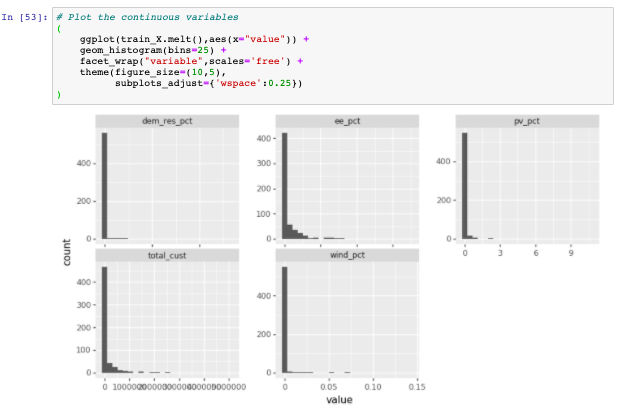

When running the first method through my preliminary pipeline, my mean out-of-sample score was - 21082.6 under my best model, a random forest with a depth of 3 and 1250 estimators. For the second method it was not much better, as my best score was -21120.4. On the test data my MSE was 16057.5 and my r2 score was -0.043. 
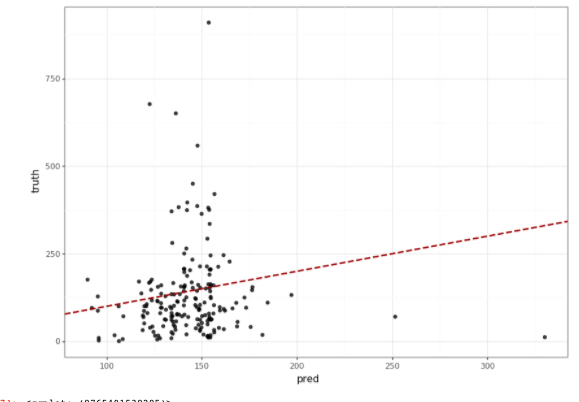

When I used the median method from Attempt 1.5 these were my results. As reference, the standard deviation of my train_y is 146.39. So my mean squared error roughly reflects that, with the lowest RMSE coming out at 141.42.

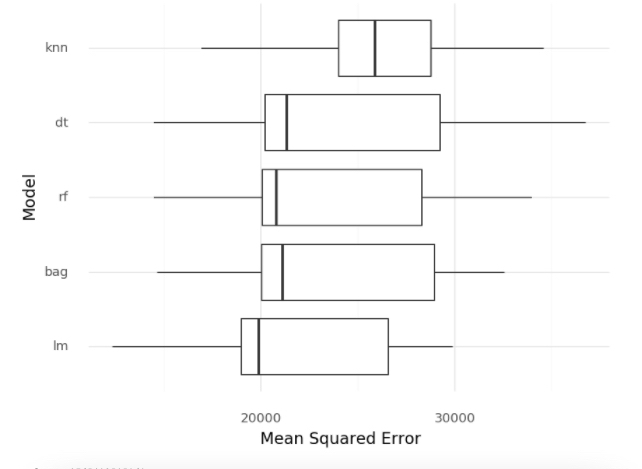

When I ran Attempt 1.5 through my untuned pipeline, I got these results, which were marginally better but not by much.

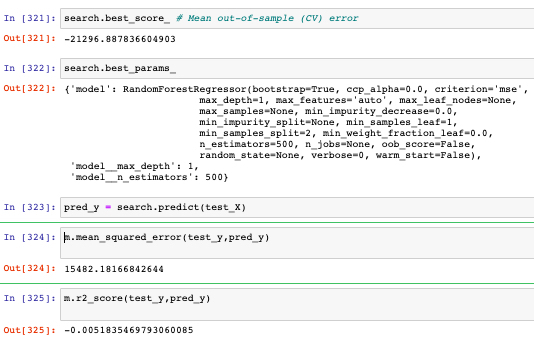

Attempt 2: My first positive R2 value thank god! But the MSE is still pretty bad.
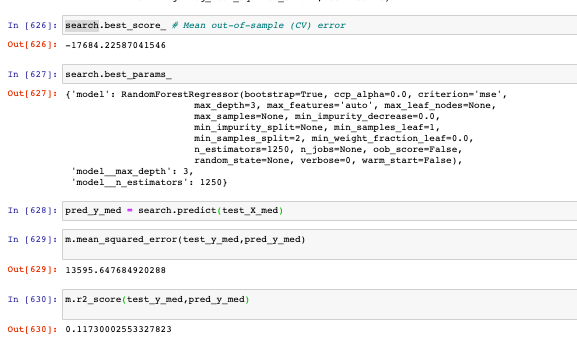